In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

/home/ec2-user/anaconda3/envs/tf+sklearn_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
from sklearn.datasets import fetch_mldata

In [4]:
def load_mnist():
    """Function to download mnst data from public source.
        Args:
            None

        Returns:
            train_set --tuple of data and target

            valid_set --tuple of data and target

            test_set --tuple of data and target
    """
    import urllib.request, pickle, gzip
    r = urllib.request.urlretrieve('http://deeplearning.net/data/mnist/mnist.pkl.gz','mnist.pkl.gz')
    filename = r[0]
    with gzip.open(filename, 'rb') as f:
        train_set, valid_set, test_set = pickle.load(f,encoding='bytes')
        f.close()
    return train_set, valid_set, test_set

train_set, valid_set, test_set = load_mnist()


In [5]:
len(train_set[1])

50000

In [6]:
train_set[0].shape
X_train = train_set[0]
Y_train = train_set[1]

X_test = test_set[0]
Y_test = test_set[1]

In [7]:
shuffle_index = np.random.permutation(X_test.shape[0])

In [8]:
X_train, Y_train = X_train[shuffle_index], Y_train[shuffle_index]

In [9]:
Y_train_5 = (Y_train == 5)
Y_test_5 = (Y_test == 5)


In [10]:
from sklearn.linear_model import SGDClassifier

In [11]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,Y_train_5)

/home/ec2-user/anaconda3/envs/tf+sklearn_p36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

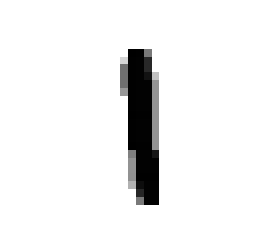

[False]
1
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.     

In [12]:
random_integer = int(np.ceil(np.random.rand(1)*X_train.shape[0])[0])
some_digit = X_train[random_integer]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()
print(sgd_clf.predict([some_digit]))
print(Y_train[random_integer])
print(some_digit.reshape(28, 28))

In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [14]:
skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, Y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    Y_train_folds = (Y_train_5[train_index])
    X_test_fold = X_train[test_index]
    Y_test_fold = (Y_train_5[test_index])
    clone_clf.fit(X_train_folds,Y_train_folds)
    Y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(Y_pred == Y_test_fold)
    print (n_correct/len(Y_pred))
    
    

0.9610077984403119


/home/ec2-user/anaconda3/envs/tf+sklearn_p36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ec2-user/anaconda3/envs/tf+sklearn_p36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." %

0.9640071985602879
0.9567827130852341


In [15]:
from sklearn.model_selection import cross_val_score

In [16]:
cross_val_score(sgd_clf,X_train,Y_train_5, cv=3 ,scoring = 'accuracy')

/home/ec2-user/anaconda3/envs/tf+sklearn_p36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ec2-user/anaconda3/envs/tf+sklearn_p36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." %

array([0.9610078 , 0.9640072 , 0.95678271])

In [17]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit (self, X,y=None):
        pass
    
    def predict (self, X):
        return np.zeros((len(X),1), dtype = bool)
        

In [18]:
never5_clf = Never5Classifier()
cross_val_score(never5_clf,X_train, Y_train_5, cv=3, scoring='accuracy')

array([0.9115177 , 0.91029103, 0.91929193])

In [19]:
from sklearn.model_selection import cross_val_predict

Y_train_pred = cross_val_predict(sgd_clf, X_train, Y_train_5, cv=3)

/home/ec2-user/anaconda3/envs/tf+sklearn_p36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ec2-user/anaconda3/envs/tf+sklearn_p36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." %

In [20]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(Y_train_5,Y_train_pred)
recall_mat = conf_mat / conf_mat.sum(axis=1)
precision_mat = conf_mat / conf_mat.sum(axis=0)

In [21]:
print('recall score: {0:2f}'.format(np.take(recall_mat,(3))))
print('precision score: {0:2f}'.format(np.take(precision_mat,(3))))

recall score: 0.748552
precision score: 0.784933


In [22]:
from sklearn.metrics import precision_score, recall_score 

In [23]:
precision_score(Y_train_5, Y_train_pred)

0.7849331713244229

In [24]:
recall_score(Y_train_5, Y_train_pred)

0.7485515643105446

In [25]:
2/(np.reciprocal(precision_score(Y_train_5, Y_train_pred))+np.reciprocal(recall_score(Y_train_5, Y_train_pred)))

0.7663107947805456

In [26]:
from sklearn.metrics import f1_score

f1_score(Y_train_5,Y_train_pred)

0.7663107947805456

In [27]:
sgd_clf.decision_function([some_digit])

array([-23.0826278])

In [28]:
Y_train_scores = cross_val_predict(sgd_clf, X_train, Y_train_5, cv=3, method='decision_function')

/home/ec2-user/anaconda3/envs/tf+sklearn_p36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ec2-user/anaconda3/envs/tf+sklearn_p36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." %

In [29]:
Y_train_scores

array([-28.77183995,   3.84629858, -50.37984363, ..., -41.13745218,
       -38.51476588, -74.84226825])

In [30]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(Y_train_5,Y_train_scores)

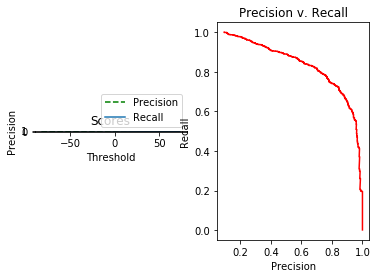

In [31]:
ax1 = plt.subplot2grid((1,2),(0,0),aspect='equal')
ax1.set (title='Scores')
ax1.plot(thresholds, precisions[:-1], '--g', label = 'Precision')
ax1.plot(thresholds, recalls[:-1], label = 'Recall')
plt.xlabel("Threshold")
plt.ylabel("Precision")
plt.legend(loc="lower right")

ax2 = plt.subplot2grid((1,2),(0,1))
ax2.set(title = 'Precision v. Recall')
ax2.plot(precisions[:-1],recalls[:-1], '-r')
plt.xlabel('Precision')
plt.ylabel('Recall')
from scipy.interpolate import griddata




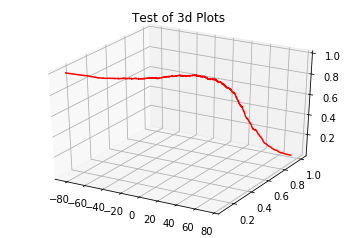

In [32]:
fig = plt.figure()
X = np.meshgrid(thresholds)
Y = np.meshgrid(precisions[:-1])
ax3d = fig.add_subplot(111, projection='3d', title='Test of 3d Plots')
ax3d.plot(thresholds,precisions[:-1],recalls[:-1], '-r')


In [33]:
Y_train_90 = (Y_train_scores > 24)
print(precision_score(Y_train_5,Y_train_90))
print(recall_score(Y_train_5,Y_train_90))


0.9786476868327402
0.3186558516801854


In [34]:
from sklearn.metrics import roc_curve

In [35]:
fpr, tpr, thresholds = roc_curve(Y_train_5, Y_train_scores)

-0.10500000000000001 1.105


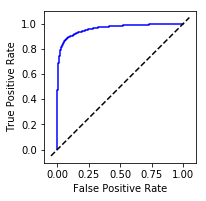

In [36]:
roc_fig = plt.figure()
ax1 = plt.subplot2grid((1,2),(0,0),fig= roc_fig, aspect='equal')
ax1.plot(fpr,tpr,'-b')

x = np.linspace(*ax1.get_xlim())
ax1.plot(x, x, '--k')


ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')

print(*ax1.get_xlim())

In [37]:
ax1


In [38]:
from sklearn.metrics import roc_auc_score

In [39]:
  roc_auc_score(Y_train_5,Y_train_pred)

0.8645898896303735

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
forest_clf = RandomForestClassifier(random_state=42)

In [42]:
y_probas_forest = cross_val_predict(forest_clf, X_train, Y_train_5, cv=3, method='predict_proba')

In [43]:
Y_probas_scores = y_probas_forest[:,1]

Text(0.5,1,'Probas Scores')

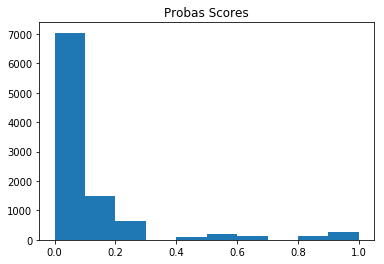

In [44]:
ax1 = plt.subplot2grid((1,1),(0,0))
ax1.hist(Y_probas_scores)
ax1.set_title('Probas Scores')

In [45]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(Y_train_5,Y_probas_scores)

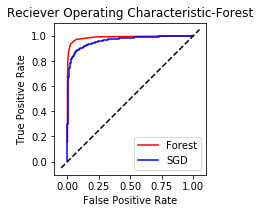

In [46]:
ax2 = plt.subplot2grid((1,2),(0,1),aspect='equal')
ax2.plot(fpr_forest,tpr_forest,'-r', label='Forest')
ax2.plot(fpr,tpr,'-b', label='SGD')
x = np.linspace(*ax1.get_xlim())
ax2.plot(x,x,'--k')
ax2.set_title('Reciever Operating Characteristic-Forest')
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
plt.legend(loc='lower right')


In [48]:
sgd_clf.fit(X_train,Y_train)
sgd_clf.predict([some_digit])

/home/ec2-user/anaconda3/envs/tf+sklearn_p36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([1])

In [49]:
cross_val_score(sgd_clf,X_train,Y_train,cv=3,scoring='accuracy')

/home/ec2-user/anaconda3/envs/tf+sklearn_p36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ec2-user/anaconda3/envs/tf+sklearn_p36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." %

array([0.88069544, 0.88065967, 0.8765395 ])

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [52]:
cross_val_score(sgd_clf,X_train_scaled, Y_train, cv=3, scoring='accuracy')

/home/ec2-user/anaconda3/envs/tf+sklearn_p36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ec2-user/anaconda3/envs/tf+sklearn_p36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." %

array([0.89508393, 0.89535232, 0.89816762])

In [53]:
Y_train_pred = cross_val_predict(forest_clf,X_train_scaled, Y_train, cv=3)

In [54]:
conf_mat = confusion_matrix(Y_train, Y_train_pred)

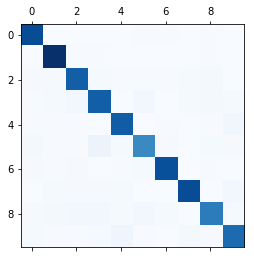

In [55]:
plt.matshow(conf_mat,cmap='Blues')

In [56]:
norm_conf_mat = conf_mat/conf_mat.sum(axis=1, keepdims=True)

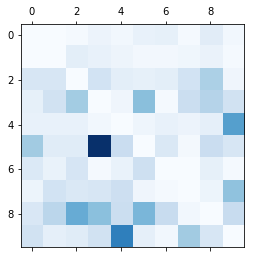

In [57]:
np.fill_diagonal(norm_conf_mat,0)
plt.matshow(norm_conf_mat, cmap='Blues')

In [58]:
cl_a, cl_b = 3, 5
X_aa = X_train[(Y_train == cl_a) & (Y_train_pred == cl_a)]
X_ab = X_train[(Y_train == cl_a) & (Y_train_pred == cl_b)]
X_ba = X_train[(Y_train == cl_b) & (Y_train_pred == cl_a)]
X_bb = X_train[(Y_train == cl_b) & (Y_train_pred == cl_b)]

In [59]:
def plot_digits(data, images_per_row=None):
    images_per_row = images_per_row or int(np.ceil(np.sqrt(len(data))))
    rows = int(np.ceil(len(data)/images_per_row))
    fig = plt.figure()
    i = 0
    j = 0
    k=0
    for d in data:
        i = int(np.floor(k/images_per_row))
        j = k % images_per_row
        k = k+1
        d = d.reshape(28, 28)
        #print(i,j,images_per_row,rows)
        ax = plt.subplot2grid((rows,images_per_row),(i,j))
        ax.imshow(d, cmap = matplotlib.cm.binary,
        interpolation="nearest")
        plt.axis("off")
       

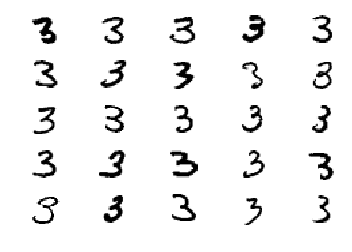

In [60]:
plot_digits(X_aa[:25])

(None, None)

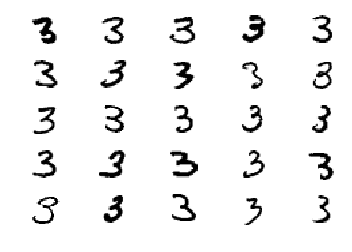

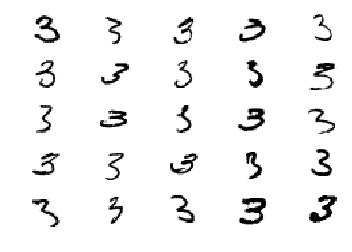

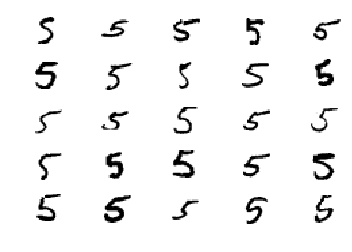

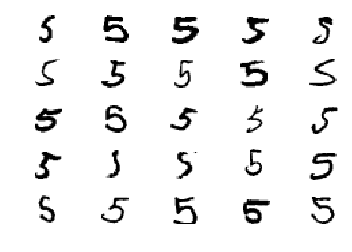

In [61]:
plot_digits(X_aa[:25], images_per_row=5) , plot_digits(X_ab[:25], images_per_row=5)
plot_digits(X_bb[:25], images_per_row=5), plot_digits(X_ba[:25], images_per_row=5) ,
